In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var, ATHAM_constants
from pyclouds.plotting import plot_hydrometeor_evolution
from unified_microphysics import constants as um_constants

/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:49: UserWarning: `model_constraint` not provided, assuming isometric
  warnings.warn("`model_constraint` not provided, assuming isometric")
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:170: UserWarning: Using default value for b_K
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:170: UserWarning: Using default value for a_K
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:197: UserWarning: EoS calculation stored within microphysics, should really use something defined externally
  warnings.warn("EoS calculation stored within microphysics, should really use something defined externally")
/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:322: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_r = (pi*(qg*rho_l)/(qr*rho_g)*N0r)**(1./4.)


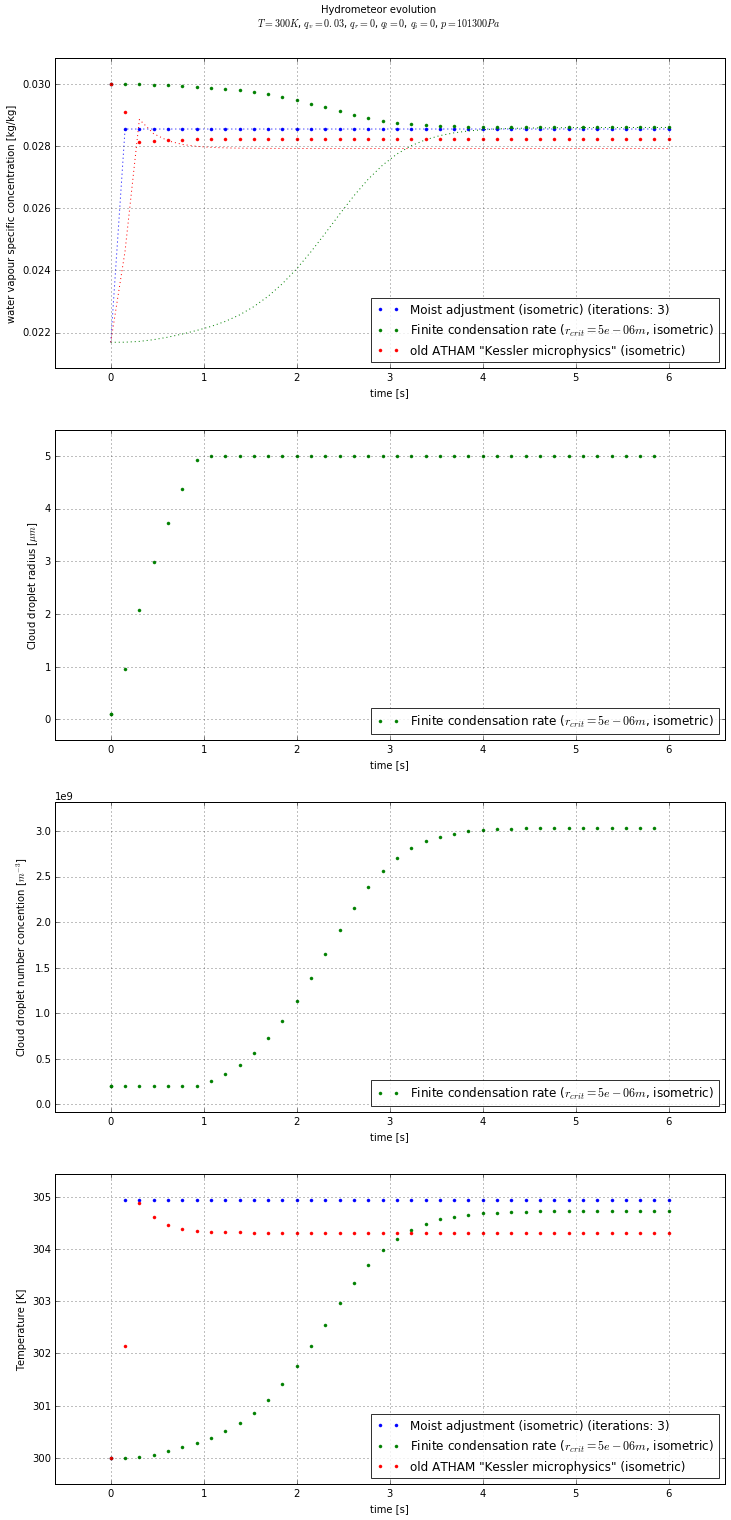

In [3]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] = 3.0e-2
initial_condition[Var.q_l] = 0.0e-2

initial_condition[Var.T] = 300.
initial_condition[Var.p] = 101300. # [Pa]

t_ = np.linspace(0., 6., 40)

SolverClass = odespy.Euler
constants = ATHAM_constants

solutions = []
#solutions.append(microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0))
solutions.append(cloud_microphysics.MoistAdjustmentMicrophysics(constants=constants).integrate(initial_condition=initial_condition, t=t_, iterations=3))
#solutions.append(cloud_microphysics.MoistAdjustmentMicrophysics(constants=constants, model_constraint='isobaric').integrate(initial_condition=initial_condition, t=t_, iterations=3))

sol_fcond = cloud_microphysics.FiniteCondensationTimeMicrophysics(constants=constants).integrate(initial_condition=initial_condition, t=t_, SolverClass=SolverClass)
solutions.append(sol_fcond)
solutions.append(cloud_microphysics.OldATHAMKesslerFortran().integrate(initial_condition=initial_condition, t=t_))



#sol2.plot()
plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'r_c', 'Nc', 'T', ], initial_condition=initial_condition)

In [4]:
sol_fcond.F[:,Var.r]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [24]:
ATHAM_constants

{'L_v': 2500800.0,
 'R_d': 287.03999999999996,
 'R_v': 467.5,
 'cp_d': 1004.64,
 'cp_i': 2103.0,
 'cp_l': 4183.0,
 'cp_v': 1870.0,
 'cv_d': 717.6,
 'cv_v': 1402.5,
 'pv_sat': {'a0_ice': 22.33,
  'a0_lq': 17.25,
  'a1_ice': -2.0,
  'a1_lq': -36.0,
  'p0vs': 610.7},
 'rho_i': 917.0,
 'rho_l': 1000.0}